In [1]:
"""
baseline 1: history pCVR of creativeID/adID/camgaignID/advertiserID/appID/appPlatform
"""
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import pandas as pd

In [37]:
tr = pd.read_csv('../data/pre/new_generated_train.csv', index_col=0)
te = pd.read_csv('../data/pre/new_generated_test.csv', index_col=0)

/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [65]:
tr_copy = tr.copy(deep=True) 

In [4]:
ac = pd.read_csv('../data/pre/app_categories.csv')
ac.loc[ac.appID==465]

,appID,appCategory
148,465,209


In [5]:
fs = tr.columns.values[1:]
fs

array(['creativeID', 'userID', 'positionID', 'connectionType',
       'telecomsOperator', 'adID', 'camgaignID', 'advertiserID', 'appID',
       'appPlatform', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'hometown', 'residence', 'sitesetID', 'positionType',
       'appCategory', 'clickTime_d', 'weekDay', 'clickTime_h',
       'clickTime_m', 'conversionTime_d'], dtype=object)

In [6]:
lst = [] # skip userID

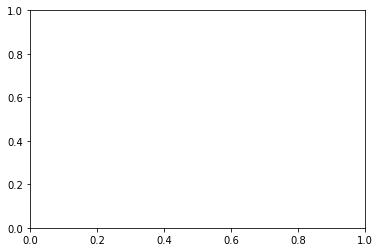

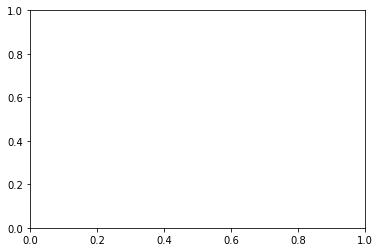

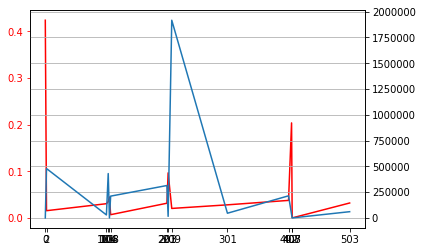

In [10]:
key = 'appCategory'
s = tr.groupby(key).apply(lambda df: np.mean(df.label))
ss = tr.groupby(key).apply(lambda df: len(df))
lst.append(s.std())

fig,ax1 = plt.subplots()
ax1.plot(s.index, s.values, 'r')
ax1.tick_params('y', colors='r')
ax1.xaxis.set_ticks(s.index)
ax2 = ax1.twinx()
ax2.plot(s.index, ss.values)
plt.grid()
plt.show()

In [8]:
ffs = ['appCategory', 'creativeID', 'positionID', 'connectionType',
       'telecomsOperator', 'adID', 'camgaignID', 'advertiserID', 'appID',
       'appPlatform', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'hometown', 'residence', 'sitesetID', 'positionType',
       'clickTime_d', 'weekDay', 'clickTime_h', 'clickTime_m']
dict_f_stat = {}

In [23]:
dict_f_stat

{'adID': count      3447.000000
 mean       1087.765593
 std       12796.393644
 min           1.000000
 25%          12.000000
 50%          44.000000
 75%         181.500000
 max      596347.000000
 dtype: float64, 'advertiserID': count    8.900000e+01
 mean     4.212953e+04
 std      2.070383e+05
 min      6.000000e+00
 25%      3.170000e+02
 50%      2.334000e+03
 75%      1.803900e+04
 max      1.916646e+06
 dtype: float64, 'age': count        81.000000
 mean      46290.469136
 std       69772.295653
 min          68.000000
 25%        1604.000000
 50%       13473.000000
 75%       71968.000000
 max      445656.000000
 dtype: float64, 'appCategory': count    1.400000e+01
 mean     2.678234e+05
 std      5.023502e+05
 min      6.300000e+01
 25%      1.881750e+04
 50%      5.298450e+04
 75%      2.892125e+05
 max      1.916646e+06
 dtype: float64, 'appID': count    5.000000e+01
 mean     7.499056e+04
 std      2.743816e+05
 min      6.300000e+01
 25%      6.607500e+02
 50%      6.68

In [66]:
subffs = ['adID']
for f in subffs:
    st = tr.groupby(f).apply(lambda df: np.mean(df.label))
    st_n = tr.groupby(f).apply(lambda df: len(df))    
    st_n_te = te.groupby(f).apply(lambda df: len(df))
    #s = st_n.describe()
    #dict_f_stat[f] = s
    print(f,st,st_n/st_n_te)

adID adID
1       0.000000
2       0.024390
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.002574
10      0.000000
11      0.000000
12      0.015837
13      0.062500
14      0.200000
15      0.000000
16      0.063830
17      0.002175
18      0.000000
19      0.000000
20      0.000000
21      0.119403
22      0.000000
23      0.000000
24      0.090909
25      0.000000
26      0.000000
27      0.000000
28      0.005834
29      0.000000
30      0.000000
          ...   
3584    0.025862
3585    0.010397
3586    0.000000
3587    0.000000
3588    0.070588
3589    0.000000
3590    0.021164
3591    0.000000
3592    0.090909
3593    0.025192
3594    0.000000
3595    0.000000
3596    0.000000
3597    0.000000
3598    0.001912
3599    0.020000
3600    0.000000
3601    0.029412
3602    0.000000
3603    0.045455
3604    0.125000
3605    0.062500
3608    0.000000
3609    0.000000
3610    0.024096
3612    0.034483
3613    0.000000
3614

In [ ]:
nlst = []
for f in ffs:
    key = f
    s = tr.groupby(key).apply(lambda df: np.mean(df.label))
    nlst.append(s.std())

In [ ]:
len(ffs)==len(nlst)

In [ ]:
n = list(zip(ffs, nlst))
n = pd.DataFrame(n)
ls = n.sort_values(by=1, ascending=False)[0]

In [10]:
ls.values

NameError: name 'ls' is not defined

In [ ]:
['creativeID', 'positionID','connectionType']